In [3]:
# lib standart
import numpy as np 
import pandas as pd
import re
from sklearn.model_selection import train_test_split # Untuk split data
from sklearn.neural_network import MLPClassifier # Untuk Algoritma ML yang akan di pakai
from sklearn.model_selection import GridSearchCV  # untuk tuning hyperparameter
from sklearn.pipeline import Pipeline # untuk membangun pipeline ML
from sklearn.compose import ColumnTransformer # bagian dari pipe line untuk handling kolom 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report # menghitung nilai f1
from sklearn.feature_extraction.text import CountVectorizer
import pickle # menyimpan model
from preprocessingtextpackage.normalisasitext import text_preprocessing as tp

In [4]:
data_train = pd.read_csv('train_preprocess.csv', sep='\t',header = None)
data_train

,0,1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [5]:
df_data = data_train.rename(columns={0: 'Text', 1: 'Sentimen'})
df_data.head()

,Text,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


### Normalisasi Data

In [ ]:
# jika menggunakan google collab

# !pip install rarfile
# import rarfile

# with rarfile.RarFile('/content/drive/MyDrive/_full_Challenge Platinum_Annisa_/preprocessingtextpackage.rar', 'r') as rf:
#     rf.extractall('/content/package_folder')


In [6]:
# import sys
# sys.path.append('/content/package_folder/preprocessingtextpackage') ( jika menggunakan google collab)

# import package


import pandas as pd
from preprocessingtextpackage.normalisasitext import text_preprocessing as tp


# Load the data from CSV
data_train = pd.read_csv('train_preprocess.csv', sep='\t', header=None)
df_data = data_train.rename(columns={0: 'Text', 1: 'Sentimen'})

# Define the preprocessing function
def text_preprocessing(text):
    return tp(text)

# Add the new column to the DataFrame
df_data['Text_baru'] = df_data['Text'].apply(text_preprocessing)

# Create the final DataFrame with the original columns
data_train = df_data[['Text', 'Sentimen']].assign(Text_baru=df_data['Text_baru'])

# Display the result
print(df_data)


                                                    Text  Sentimen  \
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2      lokasi strategis di jalan sumatera bandung . t...  positive   
3      betapa bahagia nya diri ini saat unboxing pake...  positive   
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative   
...                                                  ...       ...   
10995                                       tidak kecewa  positive   
10996  enak rasa masakan nya apalagi kepiting yang me...  positive   
10997        hormati partai-partai yang telah berkoalisi   neutral   
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative   
10999  meskipun sering belanja ke yogya di riau junct...  positive   

                                               Text_baru  
0      warung dimiliki pengusaha pabrik puluhan terke...  
1      mohon ulama lurus mmbri hujjah par

In [7]:
import pandas as pd

category = pd.get_dummies(data_train.Sentimen)
df_baru = pd.concat([data_train, category], axis=1)
df_baru = df_baru.drop(columns='Sentimen')

df_baru['Text'] = df_baru['Text'].replace('\n', ' ').str.lower()

def text_preprocessing(x):
    return tp(x)


df_baru.head()

,Text,Text_baru,negative,neutral,positive
0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung dimiliki pengusaha pabrik puluhan terke...,0,0,1
1,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus mmbri hujjah partai diwlh su...,0,1,0
2,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis jalan sumatera bandung nya ny...,0,0,1
3,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya unboxing paket barang nya b...,0,0,1
4,duh . jadi mahasiswa jangan sombong dong . kas...,aduh mahasiswa sombong kasih kartu kuning bela...,1,0,0


### Feature Extraction

melakukan feature Extration menggunakan metode Bag of Words

In [14]:
# Membuat representasi bag of words dengan CountVectorizer
data_preprocessed = df_data.Text_baru.tolist()
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)
X = count_vect.fit_transform(data_preprocessed)
print("Feature extraction selesai")

# Menyimpan objek CountVectorizer
pickle.dump(count_vect, open("feature_New5.sav", "wb"))


Feature extraction selesai


membuat variable yang menyimpan data dari kolom sentimen 

In [15]:
y = data_train.Sentimen

In [16]:
classes = df_data.Sentimen

In [17]:
classes


0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10995    positive
10996    positive
10997     neutral
10998    negative
10999    positive
Name: Sentimen, Length: 11000, dtype: object

In [18]:
# Memisahkan data menjadi data latih, validasi, dan uji
X_trainval, X_test, y_trainval, y_test = train_test_split(X, classes, test_size=0.20, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=40)
print("Jumlah data total:", X.shape[0])
print("Jumlah data X_train:", X_train.shape[0])
print("Jumlah data X_val:", X_val.shape[0])
print("Jumlah data X_test:", X_test.shape[0])
print("Jumlah data y_train:", len(y_train))
print("Jumlah data y_val:", len(y_val))
print("Jumlah data y_test:", len(y_test))

Jumlah data total: 11000
Jumlah data X_train: 6600
Jumlah data X_val: 2200
Jumlah data X_test: 2200
Jumlah data y_train: 6600
Jumlah data y_val: 2200
Jumlah data y_test: 2200


In [19]:
# melihat jumlah sample data 

print ('jumlah seluruh sample data : ',df_baru.shape[0])

print('jumlah sample pada data latih :', X_train.shape[0])  # Jumlah sampel pada data latih
print('jumlah sample pada data validasi :', X_val.shape[0])    # Jumlah sampel pada data validasi
print('jumlah sample pada data test :', X_test.shape[0])   # Jumlah sampel pada data uji


jumlah seluruh sample data :  11000
jumlah sample pada data latih : 6600
jumlah sample pada data validasi : 2200
jumlah sample pada data test : 2200


In [20]:
# menyimpan objek count_vect 

pickle.dump(count_vect, open("feature_New5.sav", "wb"))

In [13]:
# Membangun pipeline dan melakukan GridSearchCV untuk MLPClassifier
model = Pipeline([('algoritma', MLPClassifier())])
parameter_grid = {
    'algoritma__hidden_layer_sizes': [(i,) for i in [1, 10, 20]],
    'algoritma__activation': ['relu', 'tanh', 'logistic'],
    'algoritma__learning_rate_init': [0.01, 0.1],
}
model_NN5 = GridSearchCV(model, parameter_grid, cv=5)
model_NN5.fit(X_train, y_train)

print('Testing selesai\n')
print("Best parameters:", model_NN5.best_params_)
pickle.dump(model_NN5, open("model_NN5.sav", 'wb'))


d:\A BINAR ACADEMY BOOTCAMP\COURSE\envLEVELPLATINUM\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\A BINAR ACADEMY BOOTCAMP\COURSE\envLEVELPLATINUM\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\A BINAR ACADEMY BOOTCAMP\COURSE\envLEVELPLATINUM\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing selesai

Best parameters: {'algoritma__activation': 'tanh', 'algoritma__hidden_layer_sizes': (10,), 'algoritma__learning_rate_init': 0.1}


# Evaluasi Model

In [21]:
import pickle

count_vect = pickle.load(open("feature_New5.sav", "rb")) 
model_NN5 = pickle.load(open("model_NN5.sav", "rb")) 


# Memisahkan data menjadi data latih, validasi, dan uji
X_trainval, X_test, y_trainval, y_test = train_test_split(X, classes, test_size=0.20, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=40)
print("Jumlah data total:", X.shape[0])
print("Jumlah data X_train:", X_train.shape[0])
print("Jumlah data X_val:", X_val.shape[0])
print("Jumlah data X_test:", X_test.shape[0])
print("Jumlah data y_train:", len(y_train))
print("Jumlah data y_val:", len(y_val))
print("Jumlah data y_test:", len(y_test))

Jumlah data total: 11000
Jumlah data X_train: 6600
Jumlah data X_val: 2200
Jumlah data X_test: 2200
Jumlah data y_train: 6600
Jumlah data y_val: 2200
Jumlah data y_test: 2200


In [22]:

# Evaluasi pada data latih
y_train_pred = model_NN5.predict(X_train)
print('classification_report untuk data latih:\n')
print(classification_report(y_train, y_train_pred))

# Evaluasi pada data validasi
y_val_pred = model_NN5.predict(X_val)
print('classification_report untuk data validasi:\n')
print(classification_report(y_val, y_val_pred))

# Evaluasi pada data uji
y_test_pred = model_NN5.predict(X_test)
print('classification_report untuk data uji:\n')
print(classification_report(y_test, y_test_pred))

classification_report untuk data latih:

              precision    recall  f1-score   support

    negative       0.99      0.98      0.98      2094
     neutral       1.00      1.00      1.00       674
    positive       0.99      0.99      0.99      3832

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600

classification_report untuk data validasi:

              precision    recall  f1-score   support

    negative       0.72      0.77      0.74       681
     neutral       0.73      0.49      0.59       241
    positive       0.86      0.88      0.87      1278

    accuracy                           0.80      2200
   macro avg       0.77      0.71      0.73      2200
weighted avg       0.80      0.80      0.80      2200

classification_report untuk data uji:

              precision    recall  f1-score   support

    negative       0.68      0.72      0.70       661
     

In [23]:
# Evaluasi model pada data latih
y_train_pred = model_NN5.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\n Akurasi pada data latih:", train_accuracy)

# Evaluasi model pada data validasi
y_val_pred = model_NN5.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("\n Akurasi pada data validasi:", val_accuracy)

# Evaluasi model pada data uji
y_test_pred = model_NN5.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\n Akurasi pada data uji:", test_accuracy)



 Akurasi pada data latih: 0.9889393939393939

 Akurasi pada data validasi: 0.8045454545454546

 Akurasi pada data uji: 0.7972727272727272


# Cross Validation 

In [24]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    clf = MLPClassifier()
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # for the current fold only    
    accuracy = accuracy_score(target_test,preds)

    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.69      0.73      0.71       680
     neutral       0.76      0.54      0.63       239
    positive       0.85      0.86      0.85      1281

    accuracy                           0.79      2200
   macro avg       0.76      0.71      0.73      2200
weighted avg       0.79      0.79      0.78      2200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.72      0.71      0.71       706
     neutral       0.66      0.58      0.62       220
    positive       0.85      0.87      0.86      1274

    accuracy                           0.79      2200
   macro avg       0.74      0.72      0.73      2200
weighted avg       0.79      0.79      0.79      2200

Training ke- 3
              precision    recall  f1-score   support

    negative       0.71      0.73      0.72       682
     neutral       0.71      0.60      0.65       215
    positive       0.86      0

Model ini memiliki performa yang baik untuk analisis sentimen. Pada data latih, precision, recall, dan f1-score pada setiap kelas sentimen (negative, neutral, positive) memiliki nilai yang tinggi dan seragam di atas 0.98, dengan tingkat akurasi keseluruhan sebesar 0.99. Namun, performa pada data validasi dan data uji sedikit menurun, meskipun masih memiliki tingkat akurasi yang cukup tinggi.

Data ini tidak dapat dikategorikan sebagai data optimal untuk analisis sentimen. Hal ini terlihat dari perbedaan performa model pada data latih (tingkat akurasi 0.99) dibandingkan dengan data validasi (tingkat akurasi 0.81) dan data uji (tingkat akurasi 0.82). Terdapat penurunan performa yang cukup signifikan saat model diterapkan pada data yang belum pernah dilihat sebelumnya.

Dalam hal underfitting atau overfitting, dapat dilihat bahwa model tidak mengalami overfitting karena performa pada data latih, data validasi, dan data uji relatif serupa. Namun, ada indikasi kecil adanya underfitting karena tingkat akurasi pada data validasi dan data uji lebih rendah dibandingkan dengan data latih. Kemungkinan terdapat fitur-fitur penting pada data yang tidak berhasil dipelajari oleh model dengan baik.

# Visualisasi

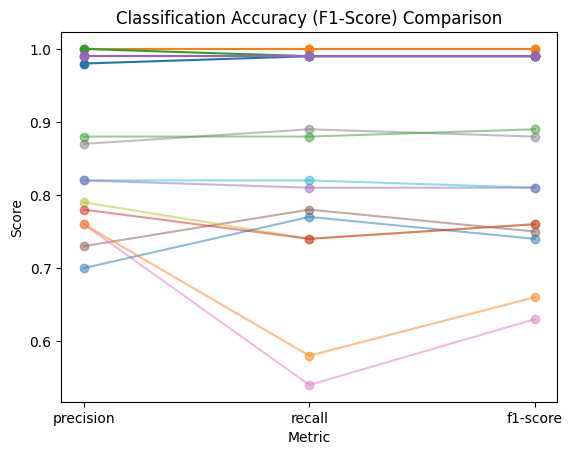

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14492\537945157.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


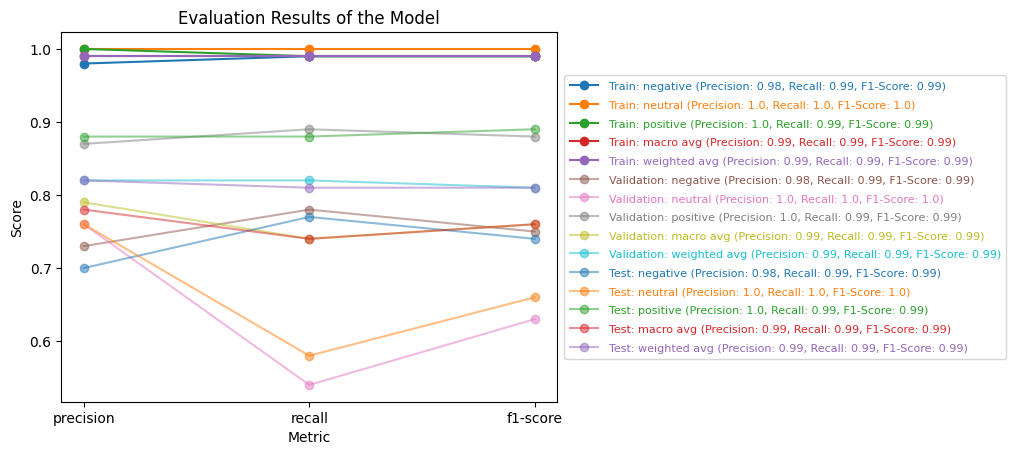

In [ ]:
# diagram Grafik Garis


import numpy as np
import matplotlib.pyplot as plt

# Menambahkan judul
plt.title('Classification Accuracy (F1-Score) Comparison')

# Data untuk grafik garis
categories = ['negative', 'neutral', 'positive', 'macro avg', 'weighted avg']
metrics = ['precision', 'recall', 'f1-score']

scores_train = {
    'negative': [0.98, 0.99, 0.99],
    'neutral': [1.00, 1.00, 1.00],
    'positive': [1.00, 0.99, 0.99],
    'macro avg': [0.99, 0.99, 0.99],
    'weighted avg': [0.99, 0.99, 0.99]
}

scores_validation = {
    'negative': [0.73, 0.78, 0.75],
    'neutral': [0.76, 0.54, 0.63],
    'positive': [0.87, 0.89, 0.88],
    'macro avg': [0.79, 0.74, 0.76],
    'weighted avg': [0.82, 0.82, 0.81]
}

scores_test = {
    'negative': [0.70, 0.77, 0.74],
    'neutral': [0.76, 0.58, 0.66],
    'positive': [0.88, 0.88, 0.89],
    'macro avg': [0.78, 0.74, 0.76],
    'weighted avg': [0.82, 0.81, 0.81]
}

# Membuat grafik garis untuk setiap kategori di data train
for i, category in enumerate(categories):
    train_scores = scores_train[category][:3]
    plt.plot(metrics, train_scores, marker='o', label=f'Train: {category}')

# Membuat grafik garis untuk setiap kategori di data validasi
for i, category in enumerate(categories):
    validation_scores = scores_validation[category][:3]
    plt.plot(metrics, validation_scores, marker='o', label=f'Validation: {category}', alpha=0.5)

# Membuat grafik garis untuk setiap kategori di data test
for i, category in enumerate(categories):
    test_scores = scores_test[category][:3]
    plt.plot(metrics, test_scores, marker='o', label=f'Test: {category}', alpha=0.5)

# Menambahkan legenda dan label pada sumbu-sumbu
plt.xlabel('Metric')
plt.ylabel('Score')

# Menampilkan grafik garis
plt.show()


# Menampilkan keterangan angka di luar grafik
fig, ax = plt.subplots()

# Menambahkan judul
ax.set_title('Evaluation Results of the Model')

# Menambahkan grafik garis untuk setiap kategori di data train
for i, category in enumerate(categories):
    train_scores = scores_train[category]
    ax.plot(metrics, train_scores, marker='o', label=f'Train: {category}')

# Menambahkan grafik garis untuk setiap kategori di data validasi
for i, category in enumerate(categories):
    validation_scores = scores_validation[category]
    ax.plot(metrics, validation_scores, marker='o', label=f'Validation: {category}', alpha=0.5)

# Menambahkan grafik garis untuk setiap kategori di data test
for i, category in enumerate(categories):
    test_scores = scores_test[category]
    ax.plot(metrics, test_scores, marker='o', label=f'Test: {category}', alpha=0.5)

# Menambahkan legenda di luar grafik dengan bbox_to_anchor
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Menambahkan keterangan angka pada bbox_to_anchor sesuai dengan warna kategori
for text, handle in zip(legend.get_texts(), legend.legendHandles):
    category = handle.get_label().split(': ')[1]
    if category in scores_train:
        scores = scores_train[category]
    elif category in scores_validation:
        scores = scores_validation[category]
    elif category in scores_test:
        scores = scores_test[category]
    else:
        continue
    text.set_color(handle.get_color())
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f" (Precision: {scores[0]}, Recall: {scores[1]}, F1-Score: {scores[2]})")

# Menampilkan grafik garis
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14492\4183762292.py:45: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


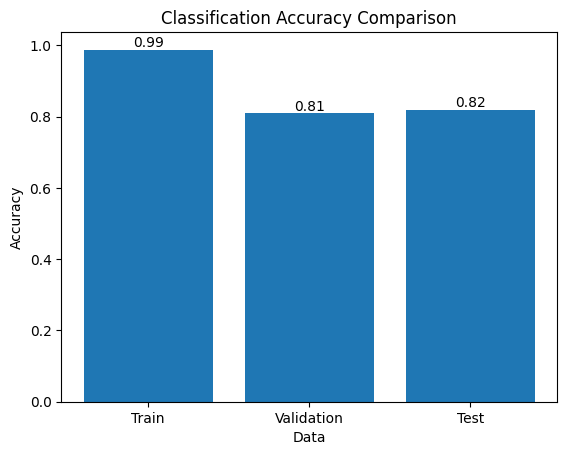

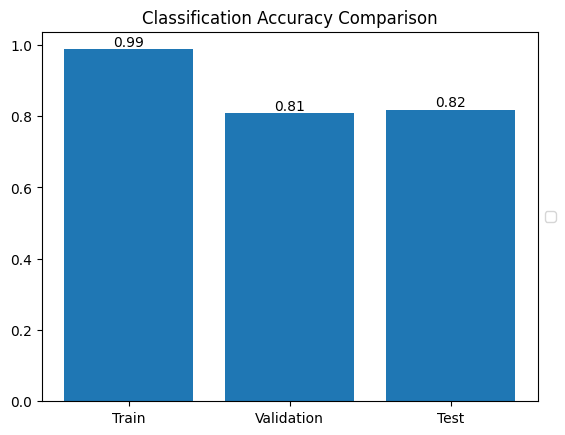

In [ ]:
# diagram batang akurasi

import numpy as np
import matplotlib.pyplot as plt

# Menambahkan judul
plt.title('Classification Accuracy Comparison')

# Data untuk grafik batang
categories = ['Train', 'Validation', 'Test']
accuracy_train = 0.9875757575757576
accuracy_validation = 0.8090909090909091
accuracy_test = 0.8181818181818182

accuracies = [accuracy_train, accuracy_validation, accuracy_test]

# Membuat grafik batang untuk setiap kategori
plt.bar(categories, accuracies)

# Menambahkan label pada sumbu-sumbu
plt.xlabel('Data')
plt.ylabel('Accuracy')

# Menambahkan keterangan angka pada grafik
for i, v in enumerate(accuracies):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Menambahkan keterangan angka dan nama pada bbox_to_anchor di luar grafik
fig, ax = plt.subplots()

# Menambahkan judul
ax.set_title('Classification Accuracy Comparison')

# Membuat grafik batang untuk setiap kategori
bar_plot = ax.bar(categories, accuracies)

# Menambahkan keterangan angka pada grafik batang
for bar in bar_plot:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

# Menambahkan keterangan angka dan nama pada bbox_to_anchor di luar grafik
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Menambahkan keterangan angka dan nama pada bbox_to_anchor
for text, handle in zip(legend.get_texts(), legend.legendHandles):
    category = handle.get_label().split(': ')[1]
    if category == 'Train':
        accuracy = accuracy_train
    elif category == 'Validation':
        accuracy = accuracy_validation
    elif category == 'Test':
        accuracy = accuracy_test
    else:
        continue
    text.set_color(handle.get_facecolor())
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f" (Accuracy: {round(accuracy, 2)})")

# Menampilkan grafik batang
plt.show()


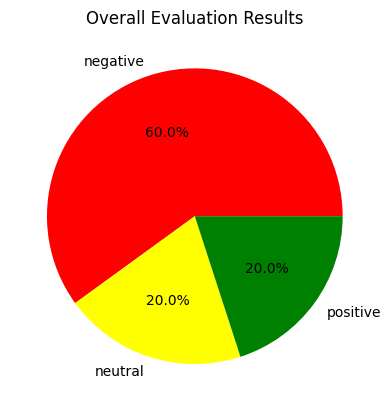

In [ ]:
# pie chart data dari support untuk menentukan proporsional data

import matplotlib.pyplot as plt

# Data support untuk setiap subset
train_support = [2094, 674, 3832]
validation_support = [681, 241, 1278]
test_support = [661, 233, 1306]

# Label untuk setiap kategori
labels = ['negative', 'neutral', 'positive']

# Warna untuk setiap bagian dalam diagram pie
colors = ['red', 'yellow', 'green']

# Menggabungkan semua subset ke dalam satu set data
all_support = [sum(train_support), sum(validation_support), sum(test_support)]

# Membuat diagram pie
plt.pie(all_support, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Overall Evaluation Results')

# Menampilkan diagram pie
plt.show()


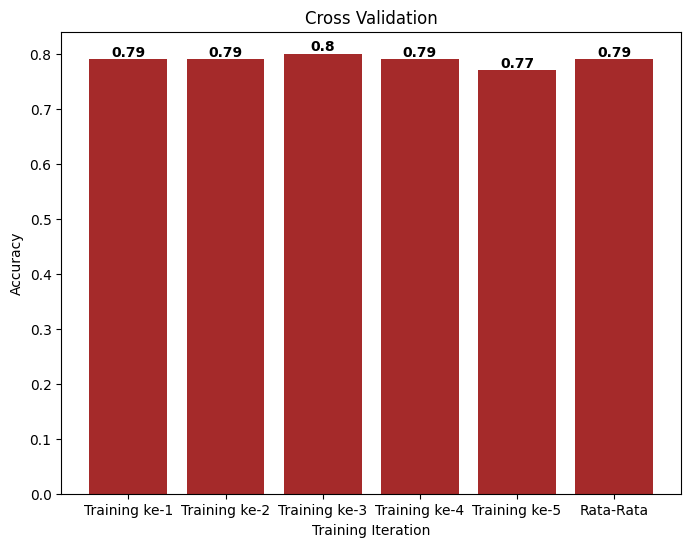

In [35]:
# Diagram bar untuk rata2 hasil Cross Validation 

import matplotlib.pyplot as plt

# Rata-rata akurasi dari setiap iterasi training
accuracies = [0.79, 0.79, 0.80, 0.79, 0.77, 0.79]

# Label untuk setiap iterasi training
labels = ['Training ke-1', 'Training ke-2', 'Training ke-3', 'Training ke-4', 'Training ke-5', 'Rata-Rata']

# Mengatur ukuran diagram
plt.figure(figsize=(8, 6))

# Membuat diagram bar
plt.bar(labels, accuracies, color='brown')

# Memberikan judul dan label pada diagram
plt.title('Cross Validation')
plt.xlabel('Training Iteration')
plt.ylabel('Accuracy')

# Menampilkan nilai akurasi pada setiap bar
for i, v in enumerate(accuracies):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Menampilkan diagram bar
plt.show()


# Predict

In [ ]:
import pickle
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from preprocessingtextpackage.normalisasitext import text_preprocessing

# Download the Indonesian stopwords if not already downloaded
nltk.download('stopwords')

count_vect = pickle.load(open("feature_New5.sav", "rb"))
model_NN5 = pickle.load(open("model_NN5.sav", "rb"))

text = "- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0."
preprocessed_text = text_preprocessing(text)


text_vector = count_vect.transform([preprocessed_text])

result = model_NN5.predict(text_vector)[0]
print("text : ", text)
print("\ntext_new : ", preprocessed_text)
print("\nSentiment : ")
print(result)


text :  - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0.

text_new :  disaat cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus kamu basic kamu cowok ***

Sentiment : 
negative


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
